## Importing The Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Dropout
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import os
import warnings
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
warnings.filterwarnings('ignore')

/var/folders/g8/q_w7xsk949l0v_g2pg_1m7h80000gn/T/ipykernel_57522/2081059855.py:13: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


## Reading The Data

In [4]:
train_data = pd.read_csv('archive_harth/train.csv')
test_data = pd.read_csv('archive_harth/test.csv')

print(f'Shape of train data is: {train_data.shape}\nShape of test data is: {test_data.shape}')

Shape of train data is: (5267996, 7)
Shape of test data is: (1193332, 7)


## Some Analysis

In [5]:
pd.set_option("display.max_columns", None)


In [6]:
train_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Activity
0,-0.901980,0.013708,0.541544,-1.079954,0.113521,0.144795,1.0
1,-0.972077,0.053302,0.503752,-1.266491,0.012782,0.136284,1.0
2,-1.008416,0.013308,0.484302,-1.336297,-0.053922,0.073320,1.0
3,-1.041245,0.036321,0.479578,-1.291301,0.132370,0.058046,1.0
4,-1.048913,0.028568,0.467828,-1.307763,0.446462,0.040277,1.0


In [7]:
train_data.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Activity'],
      dtype='object')

In [8]:
train_data.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Activity
count,5.267996e+06,5.267996e+06,5.267996e+06,5.267996e+06,5.267996e+06,5.267996e+06,5.267996e+06
mean,-8.912936e-01,-1.235684e-02,-1.746747e-01,-5.929528e-01,2.079528e-02,3.865788e-01,6.715370e+00
std,3.654646e-01,2.272979e-01,3.597894e-01,6.213003e-01,3.866165e-01,7.293941e-01,1.120623e+01
min,-8.000000e+00,-4.307617e+00,-6.574463e+00,-8.000000e+00,-7.997314e+00,-8.000000e+00,1.000000e+00
25%,-1.002718e+00,-7.864500e-02,-3.752620e-01,-9.740560e-01,-1.035160e-01,-1.430862e-01,3.000000e+00
50%,-9.760540e-01,5.398000e-03,-1.407800e-01,-4.182705e-01,3.008800e-02,7.641855e-01,7.000000e+00
75%,-8.331670e-01,7.414000e-02,4.400400e-02,-1.787110e-01,1.544010e-01,9.480780e-01,7.000000e+00
max,2.291708e+00,6.491943e+00,4.909483e+00,7.999756e+00,7.999756e+00,8.406235e+00,1.400000e+02


In [9]:
train_data['Activity'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,  13.,  14., 130.,
       140.])

<Axes: xlabel='Activity'>

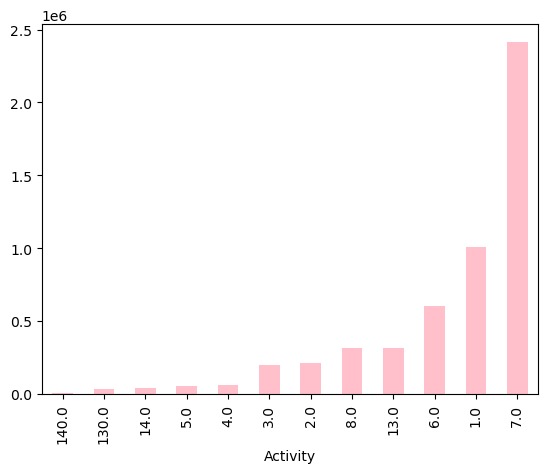

In [10]:
train_data['Activity'].value_counts().sort_values().plot(kind = 'bar', color = 'pink')


## Preparing Train And Test Data

In [11]:
x_train, y_train = train_data.iloc[:, :-2], train_data.iloc[:, -1:]
x_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1:]
x_train.shape, y_train.shape

((5267996, 5), (5267996, 1))

In [12]:
x_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1:]
x_test.shape, y_test.shape

((1193332, 5), (1193332, 1))

In [13]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)


In [14]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((1193332, 5), (1193332,), (5267996, 5), (5267996,))

In [15]:
scaling_data = MinMaxScaler()
x_train = scaling_data.fit_transform(x_train)
x_test = scaling_data.transform(x_test)


## Creating A Base Model


In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Ensure labels are properly encoded
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)  # Encode training labels
y_test = encoder.transform(y_test)       # Encode test labels

# Verify the number of unique classes
num_classes = len(np.unique(y_train))

# Build the model
model = Sequential()
model.add(Dense(units=64, kernel_initializer='normal', activation='sigmoid', input_dim=x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=num_classes, kernel_initializer='normal', activation='softmax'))  # Adjust output units

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
82313/82313 ━━━━━━━━━━━━━━━━━━━━ 69s 820us/step - accuracy: 0.5313 - loss: 1.4877 - val_accuracy: 0.6178 - val_loss: 1.2403
Epoch 2/10
82313/82313 ━━━━━━━━━━━━━━━━━━━━ 60s 722us/step - accuracy: 0.6520 - loss: 1.1473 - val_accuracy: 0.6379 - val_loss: 1.0888
Epoch 3/10
82313/82313 ━━━━━━━━━━━━━━━━━━━━ 72s 870us/step - accuracy: 0.6747 - loss: 1.0405 - val_accuracy: 0.6629 - val_loss: 1.0175
Epoch 4/10
82313/82313 ━━━━━━━━━━━━━━━━━━━━ 73s 880us/step - accuracy: 0.6890 - loss: 0.9839 - val_accuracy: 0.6908 - val_loss: 0.9840
Epoch 5/10
82313/82313 ━━━━━━━━━━━━━━━━━━━━ 95s 1ms/step - accuracy: 0.6989 - loss: 0.9462 - val_accuracy: 0.7063 - val_loss: 0.9614
Epoch 6/10
82313/82313 ━━━━━━━━━━━━━━━━━━━━ 113s 1ms/step - accuracy: 0.7062 - loss: 0.9201 - val_accuracy: 0.7116 - val_loss: 0.9417
Epoch 7/10
82306/82313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7126 - loss: 0.8998

## Hypertuning The Model

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 25)):
        model.add(layers.Dense(units = hp.Int('units' + str(i), min_value=32, max_value=512, step=32),
                               kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']),
                               activation= hp.Choice('activation', ['relu', 'sigmoid', 'tanh'])))
    model.add(layers.Dense(6, kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']), activation='softmax'))
    model.add(
            Dropout(0.2))
    model.compile(
        optimizer = 'adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials= 5,
    executions_per_trial=3,
    directory='project', project_name = 'Human_activity_recognition')

tuner.search_space_summary()


In [ ]:
tuner.search(x_train, y_train,
             epochs= 10,
             validation_data=(x_test, y_test))


In [ ]:
tuner.results_summary()


In [ ]:
model=tuner.get_best_models(num_models=1)[0]
history = model.fit(x_train,y_train, epochs=51, validation_data=(x_test,y_test))



In [ ]:
model.summary()
import tensorflow as tf

from tensorflow import keras

Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
mo_fitt = model.fit(x_train,y_train, epochs=10, validation_data=(x_test,y_test), callbacks=Callback)
print(mo_fitt.history.keys())


In [ ]:
accuracy = mo_fitt.history['accuracy']
loss = mo_fitt.history['loss']
validation_loss = mo_fitt.history['val_loss']
validation_accuracy = mo_fitt.history['val_accuracy']


plt.figure(figsize=(15, 7))

plt.subplot(2, 2, 1)
plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
plt.plot(range(len(validation_accuracy)), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy : Training Vs Validation')

plt.subplot(2, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(validation_loss)), validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss : Training Vs Validation')

plt.show()


## Conclusion :

> After hypertuning the model, it is found out that 4 layers should be there.
> Final accuracy achieved is 0.9518.

In [ ]:
model